# We Rate Dogs - Data Wrangling
##### Udacity Data Analysis NanoDegree Program

> Author: Chris Bartsch<br>
> Date: August 26, 2018

##### Cited Sources:

-  Python Documentation, including library documentation for the libraries loaded below
-  Udacity forums
-  Stack Exchange


In [474]:
#Load libraries
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import os
import json
import datetime as dt
import pandas.api.types as ptypes
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#need this to see full text of some columns, commented out for final output
#pd.set_option('display.max_colwidth', -1)

## Load Data

### Open Twitter Archive

In [475]:
#Load csv from local
tw_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [476]:
tw_arch.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

### Downloand Twitter Image Predictions

In [477]:
#Use requests library to download the img_pred_url file
img_pred_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(img_pred_url)

In [478]:
#Write the resopnse file to local file
with open("image-predictions.tsv", mode = 'wb') as file:
    file.write(response.content)

In [479]:
#Read in the tab delimited file
tw_image = pd.read_csv('image-predictions.tsv', sep = '\t')


In [480]:
tw_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Access Twitter API, Download tweets and convert to DF

In [481]:
# Set up API with key, secrets and token
consumer_key = 'xxxx'
consumer_secret = 'xxxx'
access_token = 'xxxx'
access_secret = 'xxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [482]:
#Create a folder to hold the tweets file
folder_name = 'twitterFeed'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [483]:
#Iterate through each tweet and download the twitter json
file_name = 'tweet_json.txt'
for row in tw_arch.itertuples():
    break
    #immediate break in place to make sure this doesn't run unless necessary
    try:
        tweet_json = api.get_status(row.tweet_id, tweet_mode='extended',
                                    wait_on_rate_limit = True,
                                    wait_on_rate_limit_notify = True)
        with open(os.path.join(folder_name,file_name),mode = 'a') as file:
            file.write(json.dumps(tweet_json._json))
            file.write("\n")
    
    except tweepy.TweepError as e:
        with open(os.path.join(folder_name, 'tweet_json_errors.txt'), mode = 'a') as errfile:
            errfile.write("Twitter ID: " + row.tweet_id + " Error Response: " + e.response.text)
            errfile.write("\n")

In [484]:
#write each json line of the downloaded data into a dataframe
df_json = pd.DataFrame()
with open(os.path.join(folder_name,file_name), mode='r') as file:
    x=1
    for line in file:
        linej = json.loads(line)
        df_json = df_json.append(linej,ignore_index = True)
        x+=1


In [485]:
df_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,retweet_count,retweeted,source,truncated,user,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweeted_status,quoted_status
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",38505.0,0.0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None,...,8484.0,0.0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",0.0,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', 'description': 'Your Only Source for Pawfessional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 7169634, 'friends_count': 10, 'listed_count': 4924, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 136484, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 8646, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1525830435', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': False, 'default_profile': False, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",NaN,NaN,NaN,NaN,NaN
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/m

## Begin Analysis

In [486]:
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [487]:
tw_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [488]:
#look for denominators <> 10
tw_arch[tw_arch.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [489]:
#expand view to include high numerator values
tw_arch.loc[(tw_arch.rating_denominator != 10) | (tw_arch.rating_numerator > 20),
           ['tweet_id','text','rating_numerator','rating_denominator','in_reply_to_status_id','retweeted_status_id']]

,tweet_id,text,rating_numerator,rating_denominator,in_reply_to_status_id,retweeted_status_id
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10,8.558616e+17,NaN
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10,8.558585e+17,NaN
290,838150277551247360,@markhoppus 182/10,182,10,8.381455e+17,NaN
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,8.352460e+17,NaN
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10,NaN,7.867091e+17
342,832088576586297345,@docmisterio account started on 11/15/15,11,15,8.320875e+17,NaN
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,NaN,NaN
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,NaN,NaN
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10,NaN,NaN
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10,NaN,NaN


In [490]:
sum(tw_arch.duplicated())

0

In [491]:
#floofer found in text but floofer value is "None"
tw_arch[tw_arch.text.str.contains('floofer',case = False) & (tw_arch.floofer == "None")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [492]:
#puppo found in text but puppo value is "None"
tw_arch[tw_arch.text.str.contains('puppo',case = False) & (tw_arch.puppo == "None")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
85,876120275196170240,NaN,NaN,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek",NaN,NaN,NaN,https://twitter.com/dog_rates/status/876120275196170240/photo/1,13,10,Venti,None,None,None,None
106,871879754684805121,NaN,NaN,2017-06-06 00:01:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/871879754684805121/photo/1,https://twitter.com/dog_rates/status/871879754684805121/photo/1",13,10,Lassie,None,None,None,None
134,866686824827068416,NaN,NaN,2017-05-22 16:06:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/866686824827068416/photo/1,https://twitter.com/dog_rates/status/866686824827068416/photo/1",12,10,Lili,None,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525470990336/photo/1,13,10,None,doggo,None,None,None
228,848213670039564288,8.482121e+17,4.196984e+09,2017-04-01 16:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreacted I admit. Pupgraded to an 11/10 would pet,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@0_kelvin_0 &gt;10/10 is reserved for puppos sorry Kevin,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
296,837366284874571778,NaN,NaN,2017-03-02 18:17:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She has a portrait of herself on her ear. Excellent for identification pupposes. 13/10 innovative af https://t.co/uNmxbL2lns,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837366284874571778/photo/1,13,10,Lucy,None,None,None,None
545,805826884734976000,NaN,NaN,2016-12-05 17:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duke. He is not a fan of the pupporazzi. 12/10 https://t.co/SgpBVYIL18,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805826884734976000/video/1,12,10,Duke,None,None,None,None


In [493]:
#pupper found in text but pupper value is "None"
tw_arch[tw_arch.text.str.contains('pupper',case = False) & (tw_arch.pupper == "None")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595344535552/photo/1,13,10,Gary,None,None,None,None
536,807010152071229440,NaN,NaN,2016-12-08 23:53:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lennon. He's a Boopershnoop Pupperdoop. Quite rare. Exceptionally pettable. 12/10 would definitely boop that shnoop https://t.co/fhgP6vSfhX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807010152071229440/photo/1,12,10,Lennon,None,None,None,None
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535303884801/photo/1,6,10,one,None,None,None,None
1027,746056683365994496,NaN,NaN,2016-06-23 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Arlen and Thumpelina. They are best pals. Cuddly af. 11/10 for both puppers https://t.co/VJgbgIzIHx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746056683365994496/photo/1,https://twitter.com/dog_rates/status/746056683365994496/photo/1",11,10,Arlen,None,None,None,None
1093,737310737551491075,NaN,NaN,2016-05-30 15:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Everybody stop what you're doing and watch these puppers enjoy summer. Both 13/10 https://t.co/wvjqSCN6iC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737310737551491075/video/1,13,10,None,None,None,None,None
1220,714606013974974464,NaN,NaN,2016-03-29 00:12:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here are two lil cuddly puppers. Both 12/10 would snug like so much https://t.co/zO4eb7C4tG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714606013974974464/photo/1,12,10,None,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None
1265,709901256215666688,NaN,NaN,2016-03-16 00:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","WeRateDogs stickers are here and they're 12/10! Use code ""puppers"" at checkout 🐶🐾\n\nShop now: https://t.co/k5xsufRKYm https://t.co/ShXk46V13r",NaN,NaN,NaN,"http://goo.gl/ArWZfi,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1",12,10,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">

In [494]:
#doggo found in text but doggo value is "None"
tw_arch[tw_arch.text.str.contains('doggo',case = False) & (tw_arch.doggo == "None")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/876162994446753793,14,10,None,None,None,None,None
268,841439858740625411,NaN,NaN,2017-03-14 00:04:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1",14,10,None,None,None,None,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @SchafeBacon2016: @dog_rates Slightly disturbed by the outright profanity, but confident doggos were involved. 11/10, would tailgate aga…",8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836648149003485187/photo/1,11,10,None,None,None,None,None
475,816062466425819140,NaN,NaN,2017-01-02 23:23:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://…,8.159907e+17,4.196984e+09,2017-01-02 18:38:42 +0000,"https://www.gofundme.com/surgeryforjacktheminpin,https://twitter.com/dog_rates/status/815990720817401858/photo/1",11,10,Jack,None,None,None,None
477,815990720817401858,NaN,NaN,2017-01-02 18:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://t.co/r4W111FzAq https://t.co/fQpYuMKG3p,NaN,NaN,NaN,"https://www.gofundme.com/surgeryforjacktheminpin,https://twitter.com/dog_rates/status/815990720817401858/photo/1",11,10,Jack,None,None,None,None
798,772877495989305348,NaN,NaN,2016-09-05 19:22:09 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",You need to watch these two doggos argue through a cat door. Both 11/10 https://t.co/qEP31epKEV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772877495989305348/video/1,11,10,None,None,None,None,None
934,753420520834629632,NaN,NaN,2016-07-14 02:47:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we are witnessing an isolated squad of bouncing doggos. Unbelievably rare for this time of year. 11/10 for all https://t.co/CCdlwiTwQf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753420520834629632/video/1,11,10,None,None,None,None,None
946,752568224206688256,NaN,NaN,2016-07-11 18:20:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here are three doggos completely misjudging an airborne stick. Decent efforts tho. All 9/10 https://t.co/HCXQL4fGVZ,NaN,NaN,NaN,https://vine.co/v/5W0bdhEUUVT,9,10,None,None,None,None,None
987,749036806121881602,NaN,NaN,2016-07-02 00:27:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dietrich. He hops at random. Other doggos don't understand him. It upsets him greatly. 8/10 would comfort https://t.co/U8cSRz8wzC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749036806121881602/p

In [495]:
tw_arch.name.value_counts()

None         745
a            55 
Charlie      12 
Oliver       11 
Lucy         11 
Cooper       11 
Tucker       10 
Penny        10 
Lola         10 
Bo           9  
Winston      9  
the          8  
Sadie        8  
Bailey       7  
Buddy        7  
Toby         7  
Daisy        7  
an           7  
Koda         6  
Stanley      6  
Milo         6  
Oscar        6  
Dave         6  
Bella        6  
Scout        6  
Leo          6  
Jax          6  
Rusty        6  
Jack         6  
Sunny        5  
            ..  
Rufio        1  
Andru        1  
Traviss      1  
Samsom       1  
Diogi        1  
Shadoe       1  
Bonaparte    1  
Ace          1  
Coleman      1  
Bobbay       1  
Storkson     1  
Jed          1  
Clarq        1  
Arnold       1  
Jonah        1  
Ruffles      1  
Tuck         1  
Nico         1  
Bradley      1  
Bradlay      1  
Trigger      1  
Aubie        1  
Mac          1  
Teddy        1  
Goliath      1  
Sundance     1  
Kanu         1  
Fido         1

In [496]:
#Look at all dog names which begin with a lower case letter.
f_cnt = 0
for row in tw_arch.itertuples():
    char_1 = row.name[:1]
    if char_1.islower():
        #for final output, limit to 10 records
        if f_cnt <= 10:
            print(row.name,"  ", row.text)
        f_cnt += 1
        
print(f_cnt)

such    I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
a    Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
quite    RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
quite    We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
quite    Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
not    There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  
https://t.co/dp5h9bCwU7
one    Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH

In [497]:
tw_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [498]:
sum(tw_image.duplicated())

0

In [499]:
tw_image.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [500]:
df_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,retweet_count,retweeted,source,truncated,user,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweeted_status,quoted_status
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",38505.0,0.0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None,...,8484.0,0.0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",0.0,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', 'description': 'Your Only Source for Pawfessional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 7169634, 'friends_count': 10, 'listed_count': 4924, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 136484, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 8646, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1525830435', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': False, 'default_profile': False, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",NaN,NaN,NaN,NaN,NaN
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/m

In [501]:
df_json.id.head()

0    8.924206e+17
1    8.921774e+17
2    8.918152e+17
3    8.916896e+17
4    8.913276e+17
Name: id, dtype: float64

In [502]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2342 non-null object
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2067 non-null object
favorite_count                   2342 non-null float64
favorited                        2342 non-null float64
full_text                        2342 non-null object
geo                              0 non-null object
id                               2342 non-null float64
id_str                           2342 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null object
in_reply_to_user_id_str          78 non-nul

### Issue Log

#### Quality Issues

##### twitter_archive_enhanced
-  There is inconsistency with rating denominator.  It is not always 10.  In some case both enumerator and denominator are multiplied by 10.  In other cases its less clear what the numerator and denominator are representing. &#10004;
-  Dog names are not always correctly parsed from the text  &#10004;
-  Timestamp field is not the correct data type  &#10004;
-  update missing values in puppo, doggo, pupper and floofer columns -- the plural version is not accounted for.   &#10004;
-  expanded URL contains duplicated image URLs  &#10004;
-  expanded URL contains URLs unrelated to dog rating  &#10004;<br>

##### image-predictions
-  The p1, p2 and p3 values have inconsistent case and underscores in names.  &#10004;

<b>Issue found through iteration</b>
-  Dog stage data contains 11 records where more than one stage is listed. &#10004;

##### twitter json
-  id column data type does not match archive and image prediction tables &#10004;

<b>Issue found through iteration</b>
-  p1_dog, p2_dog, p3_dog data types were changed to Object when image_predictions was merged with twitter_archive_enhanced  &#10004;




#### Tidiness Issues

##### twitter_archive_enhanced
-  Dog stage data is in 4 separate columns &#10004;
-  Retweets,  replies to tweets and tweets with no image URL need to be removed &#10004;
-  New columnn needed which contains the calculated value of numerator / denominator &#10004;

##### twitter_json
-  Retweet count and favorite count should be part of the archive table &#10004;

##### image_predictions
-  Move the image_predictions data into the twitter_archive_enhance  &#10004;


## Clean Data

###### Make clean copies of all data frames

In [503]:
tw_arch_clean = tw_arch.copy()
tw_image_clean = tw_image.copy()
tw_json_clean = df_json.copy()

### Tidiness Issues

#### TI 1.  Retweet count and favorite count in the `twitter_json` files should be part of the `twitter archived enhanced` table.  

#### QI 1. Will also fix the ID column data type quality issue which exists in the `twitter json` table

##### Define
-  Update the data type of the ID column in the twitter json table to be int64 so that a merge with the twitter archived enhanced table.
-  Use the Pandas Merge function to copy the retweet counts and favorite counts into the twitter archived enhanced table.

##### Code

In [504]:
#Update data type for merge process
tw_json_clean['tweet_id'] = tw_json_clean.id.astype('int64')
tw_json_clean.tweet_id.head(1)

0    892420643555336192
Name: tweet_id, dtype: int64

In [505]:
#create temp data frame for merging
tmp_json = tw_json_clean[['tweet_id','retweet_count','favorite_count']]
tw_arch_clean = pd.merge(tw_arch_clean, tmp_json, on='tweet_id', how='left')

##### Test

In [506]:
assert ptypes.is_integer_dtype(tw_json_clean.tweet_id)

In [507]:
tw_arch_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,4138.0,24837.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,8603.0,41879.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,9343.0,40030.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None,3097.0,20080.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None,18811.0,65026.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9T

#### TI 2. Retweets, replies to tweets and tweets with no image URL need to be removed

##### Define
-  Use Pandas functions to remove records which do not have an expanded URL
-  Use Pandas functions to drop records which are retweets or replies to tweets

##### Code

In [508]:
# remove records with missing image URLs 
tw_arch_clean = tw_arch_clean[pd.notnull(tw_arch_clean.expanded_urls) & 
                              (tw_arch_clean.expanded_urls.str.strip() != "")]

In [509]:
# remove records which are not retweets or replies to original tweets.
tw_arch_clean = tw_arch_clean[pd.isnull(tw_arch_clean.in_reply_to_status_id) & 
                              pd.isnull(tw_arch_clean.retweeted_status_id)]

##### Test

In [510]:
assert (tw_arch_clean[pd.isnull(tw_arch_clean.expanded_urls) | 
                      (tw_arch_clean.expanded_urls.str.strip() == "")].shape[0] == 0)
    
assert (tw_arch_clean[pd.notnull(tw_arch_clean.in_reply_to_status_id) | 
                      pd.notnull(tw_arch_clean.retweeted_status_id)].shape[0] == 0)

In [511]:
tw_arch_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,4138.0,24837.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,8603.0,41879.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,9343.0,40030.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None,3097.0,20080.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None,18811.0,65026.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9T

##### Cleanup columns no longer needed

In [512]:
#Drop reply and retweet columns
tw_arch_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                    'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace=True)

#### TI 3. Dog stage data is in 4 separate columns

##### Define

Convert the puppo, puppers, doggo and floofers data into a single dog_stage column using pandas melt function.

##### Clean

In [513]:
#Create temp DF containing stage data and melt that data into a single column
tmp_arch = tw_arch_clean[['tweet_id','doggo','floofer','pupper','puppo']]
tmp_arch = pd.melt(tmp_arch, id_vars=['tweet_id'],
                            value_name='dog_stage')
tmp_arch = tmp_arch[tmp_arch.dog_stage != "None"]
tmp_arch.drop('variable', axis=1, inplace=True)

In [514]:
#Merge dog stage data
tw_arch_clean = pd.merge(tw_arch_clean, tmp_arch, on='tweet_id', how='left')

In [515]:
tw_arch_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace=True)

##### Test

In [516]:
tw_arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,4138.0,24837.0,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,8603.0,41879.0,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,9343.0,40030.0,NaN


In [517]:
tw_arch_clean.dog_stage.value_counts()

pupper     229
doggo      83 
puppo      24 
floofer    10 
Name: dog_stage, dtype: int64

In [518]:
#Need to make sure we did duplicate data
tw_arch_clean.tweet_id.value_counts()

854010172552949760    2
855851453814013952    2
808106460588765185    2
751583847268179968    2
741067306818797568    2
733109485275860992    2
817777686764523521    2
781308096455073793    2
759793422261743616    2
785639753186217984    2
801115127852503040    2
667160273090932737    1
833722901757046785    1
826598365270007810    1
760521673607086080    1
880095782870896641    1
793120401413079041    1
770655142660169732    1
671163268581498880    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
769212283578875904    1
738883359779196928    1
743510151680958465    1
805487436403003392    1
672082170312290304    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
                     ..
666817836334096384    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
870308999962521604    1
872261713294495745    1
693155686491000832    1
667911425562669056    1
7403731891932569

##### New Quality Issue found - Documented in main list.
11 records were found to have more than one dog stage listed.



#### TI 4. New columnn needed which contains the calculated value of numerator / denominator

##### Define
Create a new column in the archive table which is a calculation of numerator/denominator.  


##### Clean

In [519]:
#Create a new dog_rating column by dividing rating numerator by rating denominator
tw_arch_clean['dog_rating'] = tw_arch_clean.rating_numerator / tw_arch_clean.rating_denominator

##### Test

In [520]:
tw_arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,dog_rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,4138.0,24837.0,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,8603.0,41879.0,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,9343.0,40030.0,NaN,1.2


In [521]:
tw_arch_clean.dog_rating.sort_values()

248     0.000000  
2087    0.100000  
1846    0.100000  
2011    0.100000  
1633    0.100000  
1834    0.200000  
2075    0.200000  
1678    0.200000  
1989    0.200000  
957     0.200000  
1534    0.200000  
1998    0.200000  
2059    0.200000  
2098    0.200000  
1531    0.200000  
1696    0.300000  
981     0.300000  
1936    0.300000  
1377    0.300000  
1704    0.300000  
2054    0.300000  
1192    0.300000  
1891    0.300000  
592     0.300000  
2083    0.300000  
1954    0.300000  
1658    0.300000  
1104    0.300000  
1604    0.300000  
1462    0.300000  
          ...     
313     1.400000  
335     1.400000  
726     1.400000  
341     1.400000  
120     1.400000  
350     1.400000  
351     1.400000  
294     1.400000  
291     1.400000  
674     1.400000  
73      1.400000  
587     1.400000  
382     1.400000  
152     1.400000  
161     1.400000  
610     1.400000  
51      1.400000  
137     1.400000  
421     1.400000  
95      1.400000  
269     1.400000  
272     1.40

#### TI 5. Move the `image_predictions` data into the `twitter_archive_enhanced table`

##### Define
Merge the image predictions data into the twitter_archive_enhanced data frame

##### Code

In [522]:
#Merge the image predictions data
tw_arch_clean = pd.merge(tw_arch_clean, tw_image_clean, on='tweet_id', how='left')

##### Test

In [523]:
tw_arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,4138.0,24837.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,8603.0,41879.0,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,9343.0,40030.0,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [524]:
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 2104
Data columns (total 23 columns):
tweet_id              2105 non-null int64
timestamp             2105 non-null object
source                2105 non-null object
text                  2105 non-null object
expanded_urls         2105 non-null object
rating_numerator      2105 non-null int64
rating_denominator    2105 non-null int64
name                  2105 non-null object
retweet_count         1376 non-null float64
favorite_count        1376 non-null float64
dog_stage             346 non-null object
dog_rating            2105 non-null float64
jpg_url               1981 non-null object
img_num               1981 non-null float64
p1                    1981 non-null object
p1_conf               1981 non-null float64
p1_dog                1981 non-null object
p2                    1981 non-null object
p2_conf               1981 non-null float64
p2_dog                1981 non-null object
p3                    1981 non-

### Quality Issues

#### QI 2. Dog stage data in `twitter_archive_enhanced` table contains 11 records where more than one stage is listed.

##### Define
Remove extra dog stage data found in 11 records.  Required a manual effort to read the text of each tweet 
to determine which stage is correct or if there should be a stage at all.  In 3 cases there are two dogs
rated in a single tweet.  Decision made to remove the 2nd stage listed.  

##### Clean

In [525]:
#create dupes DF to output details for the 11 records
dupe_stage = [817777686764523521,781308096455073793,751583847268179968,741067306818797568,
               855851453814013952,854010172552949760,759793422261743616,733109485275860992,
               801115127852503040,808106460588765185,785639753186217984]

df_dupes = pd.DataFrame()
for x in dupe_stage:
    df_dupes = df_dupes.append(tw_arch_clean[tw_arch_clean.tweet_id == x])

In [526]:
df_dupes

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
359,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,NaN,NaN,...,1.0,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True
360,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,NaN,NaN,...,1.0,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True
566,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12,10,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12,10,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
754,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,None,1225.0,4721.0,...,1.0,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False
755,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,None,1225.0,4721.0,...,1.0,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False
855,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12,10,just,3358.0,10020.0,...,1.0,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
856,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12,10,just,3358.0,10020.0,...,1.0,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
154,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,18538.0,46617.0,...,1.0,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True
155,855851453814013952,2017-04-22 18:31:02 

In [527]:
# Remove all stage values from these tweett IDs:817777686764523521,751583847268179968,
#785639753186217984 [not a dog]
tmp_arch = tmp_arch[~tmp_arch.tweet_id.isin([817777686764523521,751583847268179968,785639753186217984])]

# Remove doggo from these tweets: 781308096455073793, 741067306818797568 [chose initial stage listed],
#855851453814013952, 801115127852503040, 808106460588765185 [chose initial stage listed]
tmp_arch = tmp_arch[~((tmp_arch.tweet_id.isin([781308096455073793, 741067306818797568,855851453814013952,
                                               801115127852503040, 808106460588765185])) 
                      & (tmp_arch.dog_stage == 'doggo'))]

# Remove floofer from these tweets: 854010172552949760
tmp_arch = tmp_arch[~((tmp_arch.tweet_id == 854010172552949760) & (tmp_arch.dog_stage == 'floofer'))]


# Remove pupper from these tweets: 759793422261743616 [chose initial stage listed], 733109485275860992 
tmp_arch = tmp_arch[~((tmp_arch.tweet_id.isin([759793422261743616,733109485275860992])) & (tmp_arch.dog_stage == 'pupper'))]


##### Test

In [528]:
tmp_arch.tweet_id.value_counts()

882762694511734784    1
680145970311643136    1
675740360753160193    1
693590843962331137    1
786363235746385920    1
706310011488698368    1
686618349602762752    1
702598099714314240    1
884162670584377345    1
678800283649069056    1
673148804208660480    1
684588130326986752    1
682406705142087680    1
886366144734445568    1
825026590719483904    1
748337862848962560    1
775733305207554048    1
837110210464448512    1
752682090207055872    1
703407252292673536    1
821107785811234820    1
749417653287129088    1
672975131468300288    1
752660715232722944    1
684830982659280897    1
747963614829678593    1
672594978741354496    1
684147889187209216    1
803773340896923648    1
837820167694528512    1
                     ..
808733504066486276    1
836753516572119041    1
703611486317502464    1
813127251579564032    1
679527802031484928    1
776113305656188928    1
872967104147763200    1
687312378585812992    1
686760001961103360    1
697616773278015490    1
7500114001608417

#### QI 3. There is inconsistency with rating denominator in `twitter_archived_enhanced`.  It is not always 10.  In some case both enumerator and denominator are multiplied by 10.  In other cases its less clear what the numerator and denominator are representing.

##### Define

Update ratings data for those records which were extracted in correctly.  Use the dog_rating column to create a new denominator (10) and numerator.  Non-integer values will be rounded.  Based on twitter replies, the rating for tweet_id 810984652412424192 was set to 11/10.  

##### Clean

In [529]:
#output rating data for tweets which match criteria
tw_arch_clean.loc[(tw_arch_clean.rating_denominator != 10) | (tw_arch_clean.rating_numerator > 20),
           ['tweet_id','text','rating_numerator','rating_denominator',]]

,tweet_id,text,rating_numerator,rating_denominator
340,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
405,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
532,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
591,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
706,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
777,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
861,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
913,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
957,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
994,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [530]:
#set the dog rating value based on information found in data.
tw_arch_clean.loc[tw_arch_clean.tweet_id == 786709082849828864, 'dog_rating'] = 1
tw_arch_clean.loc[tw_arch_clean.tweet_id == 778027034220126208, 'dog_rating'] = 1.1
tw_arch_clean.loc[tw_arch_clean.tweet_id == 740373189193256964, 'dog_rating'] = 1.4
tw_arch_clean.loc[tw_arch_clean.tweet_id == 722974582966214656, 'dog_rating'] = 1.3
tw_arch_clean.loc[tw_arch_clean.tweet_id == 716439118184652801, 'dog_rating'] = 1.1
tw_arch_clean.loc[tw_arch_clean.tweet_id == 682962037429899265, 'dog_rating'] = 1
tw_arch_clean.loc[tw_arch_clean.tweet_id == 680494726643068929, 'dog_rating'] = 1.1
tw_arch_clean.loc[tw_arch_clean.tweet_id == 666287406224695296, 'dog_rating'] = .9
tw_arch_clean.loc[tw_arch_clean.tweet_id == 810984652412424192, 'dog_rating'] = 1.1

#not a dog - removed this record since manual verification shows it is not a dog
tw_arch_clean = tw_arch_clean[~(tw_arch_clean.tweet_id==670842764863651840)]

#set the numerator and denominator based on a standard of 10 for denominator and the dog_rating value
tw_arch_clean.rating_denominator = 10
tw_arch_clean.rating_numerator = tw_arch_clean.dog_rating * 10

##### Test

In [531]:
#Expect 1 record.   1776 numerator is the rating given.  Could not find anything in twitter which gave a more
#reasonable rating.   Possibly should be replaced with rating average.
tw_arch_clean.loc[(tw_arch_clean.rating_denominator != 10) | (tw_arch_clean.rating_numerator > 20),
           ['tweet_id','text','rating_numerator','rating_denominator',]]

,tweet_id,text,rating_numerator,rating_denominator
777,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10


In [532]:
tw_arch_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,NaN,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,NaN,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,4138.0,24837.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,8603.0,41879.0,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,9343.0,40030.0,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,None,3097.0,20080.0,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10,Jax,NaN,NaN,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10,None,18811.0,65026.0,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.17

#### QI 4.  Dog names are not always correctly parsed from the text in the `twitter_enhanced_archive` table

##### Define
Remove dog names which are not valid based on the parsing which was done to extract dog names.  Remove dog names which begin with lower case.  Add dog names based on conditions found which were not part of the extraction algorithm.

##### Clean

In [533]:
#Generate dog names based on pattern of "*named [Dog Name].*"
tw_arch_clean['namesearch'] = tw_arch_clean.text.str.extract('named\s+(\w+)\.', expand=True).astype('str')

In [534]:
# Remove innaccurate names; set names for values found with regex extract in previous step
for row in tw_arch_clean.itertuples():
    char_1 = row.name[:1]
    newname = row.namesearch
    if char_1.islower():
        tw_arch_clean.loc[row.Index, 'name'] = "None"
    if (newname != "nan"):
        tw_arch_clean.loc[row.Index, 'name'] = newname

##### Test

In [535]:
tw_arch_clean.name.value_counts()

None          688
Lucy          11 
Charlie       11 
Cooper        10 
Oliver        10 
Penny         9  
Tucker        9  
Sadie         8  
Lola          8  
Winston       8  
Daisy         7  
Toby          7  
Bailey        6  
Koda          6  
Stanley       6  
Bo            6  
Jax           6  
Oscar         6  
Bella         6  
Buddy         5  
Scout         5  
Louis         5  
Maggie        5  
Leo           5  
Milo          5  
Chester       5  
Rusty         5  
Bentley       5  
Dave          5  
Brody         4  
             ..  
Kaia          1  
Maisey        1  
Ike           1  
Rodman        1  
Bradley       1  
Seamus        1  
Coleman       1  
Nico          1  
Gromit        1  
Arya          1  
Keet          1  
Brandonald    1  
Toffee        1  
Shikha        1  
Livvie        1  
Harrison      1  
Hermione      1  
Bode          1  
Iroh          1  
Hector        1  
Bobbay        1  
Jamesy        1  
Jed           1  
Mattie        1  
Clarq     

In [536]:
tw_arch_clean[tw_arch_clean.namesearch == tw_arch_clean.name]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,namesearch
1618,675706639471788032,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10.0,10,Wylie,103.0,669.0,...,English_springer,0.990300,True,Welsh_springer_spaniel,0.002080,True,cocker_spaniel,2.013780e-03,True,Wylie
1712,673636718965334016,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10.0,10,Kip,389.0,1154.0,...,wombat,0.880257,False,corn,0.019421,False,pug,1.904430e-02,True,Kip
1821,671147085991960577,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9.0,10,Rufus,NaN,NaN,...,Yorkshire_terrier,0.467202,True,cairn,0.440122,True,silky_terrier,5.869010e-02,True,Rufus
1871,670427002554466305,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9.0,10,Spork,NaN,NaN,...,seat_belt,0.952258,False,toy_terrier,0.038872,True,beagle,3.226440e-03,True,Spork
1880,670361874861563904,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9.0,10,Cherokee,69.0,338.0,...,platypus,0.974075,False,spotted_salamander,0.011068,False,bison,3.896910e-03,False,Cherokee
1883,670303360680108032,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9.0,10,Hemry,141.0,438.0,...,Shetland_sheepdog,0.380278,True,Cardigan,0.342806,True,guinea_pig,1.562490e-01,False,Hemry
1901,669923323644657664,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10.0,10,Alphred,59.0,242.0,...,car_mirror,0.343063,False,seat_belt,0.110289,False,wing,8.014850e-02,False,Alphred
1915,669564461267722241,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,https://twitter.com/dog_rates/status/669564461267722241/photo/1,10.0,10,Alfredo,NaN,NaN,...,toy_poodle,0.623685,True,miniature_poodle,0.259920,True,standard_poodle,8.252970e-02,True,Alfredo
1920,669363888236994561,2015-11-25 03:56:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</

##### Cleanup columns no longer needed

In [537]:
tw_arch_clean.drop('namesearch', axis=1, inplace=True)

#### QI 5.  Timestamp field is not the correct data type in the `twitter_enhanced_archive` table

##### Define
Convert the timestamp column from float to datetime using Pandas datetime library.

##### Code

In [538]:
tw_arch_clean.timestamp = pd.to_datetime(tw_arch_clean.timestamp)

##### Test

In [539]:
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 0 to 2104
Data columns (total 23 columns):
tweet_id              2104 non-null int64
timestamp             2104 non-null datetime64[ns]
source                2104 non-null object
text                  2104 non-null object
expanded_urls         2104 non-null object
rating_numerator      2104 non-null float64
rating_denominator    2104 non-null int64
name                  2104 non-null object
retweet_count         1375 non-null float64
favorite_count        1375 non-null float64
dog_stage             346 non-null object
dog_rating            2104 non-null float64
jpg_url               1980 non-null object
img_num               1980 non-null float64
p1                    1980 non-null object
p1_conf               1980 non-null float64
p1_dog                1980 non-null object
p2                    1980 non-null object
p2_conf               1980 non-null float64
p2_dog                1980 non-null object
p3                   

#### QI 6.  expanded URL contains duplicated image URLs in the `twitter_enhanced_archive table`
#### QI 7.  expanded URL contains URLs unrelated to dog rating in the `twitter_enhanced_archive table`

##### Define
Remove the duplicate URLs and drop the non-twitter related URLs



##### Code

In [540]:
#iterate through DF and ensure only 1 valid URL is listed.
for row in tw_arch_clean.itertuples():
    urls = row.expanded_urls.split(',')
    final_url = []
    for url in urls:
        if url.startswith("https://twitter.com/dog_rates/status/"):
            if url not in final_url:
                final_url.append(url)
    tw_arch_clean.loc[row.Index, 'expanded_urls'] = ''.join(final_url)



##### Test

In [541]:
tw_arch_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,NaN,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,NaN,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,4138.0,24837.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,8603.0,41879.0,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10,Franklin,9343.0,40030.0,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,None,3097.0,20080.0,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,https://twitter.com/dog_rates/status/890971913173991426/photo/1,13.0,10,Jax,NaN,NaN,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,https://twitter.com/dog_rates/status/890729181411237888/photo/1,13.0,10,None,18811.0,65026.0,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. J

#### QI 8. update missing values in puppo, doggo, pupper and floofer columns to account for plural versions of the dog state date in the `twitter_archive_enhanced` table

##### Define
Use regex to find plural versions of dog stages in the text column and updat the dog_stage column appropriately.  Will need to account for situations where the stage data is already set.

##### Code

In [542]:
#create temp column to hold data for plural versions of the stage data extracted from the text field
tw_arch_clean['temp_stage'] = tw_arch_clean.text.str.extract('\s+(puppers|floofers|puppos|doggos)\s+', expand=True).astype('str')

In [543]:
#iterate through the data and add new findings to dog_stage 
for row in tw_arch_clean.itertuples():
    newstage = row.temp_stage
    if newstage != "nan":
        if pd.isnull(row.dog_stage):
            tw_arch_clean.loc[row.Index, 'dog_stage'] = newstage[:-1]
        else:
            #print tweet ids of those records which already have a dog stage
            print(row.tweet_id)


In [544]:
tw_arch_clean.drop('temp_stage', axis=1, inplace=True)

##### Test

In [545]:
tw_arch_clean[(tw_arch_clean.text.str.contains('puppo',case = False) |
              tw_arch_clean.text.str.contains('pupper',case = False) |
              tw_arch_clean.text.str.contains('floofer',case = False) |
              tw_arch_clean.text.str.contains('doggo',case = False))
              & (tw_arch_clean.dog_stage == "None")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### QI 9.  p1_dog, p2_dog, p3_dog data types were changed to Object when `image_predictions` was merged with `twitter_archive_enhanced`.

##### Define
Change the data type of p1_dog, p2_dog and p3_dog to boolean

##### Code

In [546]:
#set data types to Boolean.
tw_arch_clean.p1_dog = tw_arch_clean.p1_dog.astype('bool')
tw_arch_clean.p2_dog = tw_arch_clean.p2_dog.astype('bool')
tw_arch_clean.p3_dog = tw_arch_clean.p3_dog.astype('bool')

##### Test

In [547]:
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 0 to 2104
Data columns (total 23 columns):
tweet_id              2104 non-null int64
timestamp             2104 non-null datetime64[ns]
source                2104 non-null object
text                  2104 non-null object
expanded_urls         2104 non-null object
rating_numerator      2104 non-null float64
rating_denominator    2104 non-null int64
name                  2104 non-null object
retweet_count         1375 non-null float64
favorite_count        1375 non-null float64
dog_stage             364 non-null object
dog_rating            2104 non-null float64
jpg_url               1980 non-null object
img_num               1980 non-null float64
p1                    1980 non-null object
p1_conf               1980 non-null float64
p1_dog                2104 non-null bool
p2                    1980 non-null object
p2_conf               1980 non-null float64
p2_dog                2104 non-null bool
p3                    198

#### QI 10.  The p1, p2 and p3 values have inconsistent case and underscores in names in the `image-predictions` file.

##### Define
Strip underscores from dog names and replace with spaces; Make all dog names proper case for all words within the dog name 

##### Code

In [548]:
#clean up dog breed data so it is consistent
tw_arch_clean.p1 = tw_arch_clean.p1.str.replace("_"," ")
tw_arch_clean.p2 = tw_arch_clean.p2.str.replace("_"," ")
tw_arch_clean.p3 = tw_arch_clean.p3.str.replace("_"," ")

tw_arch_clean.p1 = tw_arch_clean.p1.str.title()
tw_arch_clean.p2 = tw_arch_clean.p2.str.title()
tw_arch_clean.p3 = tw_arch_clean.p3.str.title()

##### Test

In [549]:
tw_arch_clean.tail(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2085,666273097616637952,2015-11-16 15:14:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Can take selfies 11/10 https://t.co/ws2AMaNwPW,https://twitter.com/dog_rates/status/666273097616637952/photo/1,11.0,10,None,76.0,174.0,...,1.0,Italian Greyhound,0.176053,True,Toy Terrier,0.111884,True,Basenji,0.111152,True
2086,666268910803644416,2015-11-16 14:57:41,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Very concerned about fellow dog trapped in computer. 10/10 https://t.co/0yxApIikpk,https://twitter.com/dog_rates/status/666268910803644416/photo/1,10.0,10,None,35.0,103.0,...,1.0,Desktop Computer,0.086502,False,Desk,0.085547,False,Bookcase,0.079480,False
2087,666104133288665088,2015-11-16 04:02:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1.0,10,None,6568.0,14268.0,...,1.0,Hen,0.965932,False,Cock,0.033919,False,Partridge,0.000052,False
2088,666102155909144576,2015-11-16 03:55:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,https://twitter.com/dog_rates/status/666102155909144576/photo/1,11.0,10,None,12.0,80.0,...,1.0,English Setter,0.298617,True,Newfoundland,0.149842,True,Borzoi,0.133649,True
2089,666099513787052032,2015-11-16 03:44:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Can stand on stump for what seems like a while. Built that birdhouse? Impressive. Made friends with a squirrel. 8/10 https://t.co/Ri4nMTLq5C,https://twitter.com/dog_rates/status/666099513787052032/photo/1,8.0,10,None,67.0,154.0,...,1.0,Lhasa,0.582330,True,Shih-Tzu,0.166192,True,Dandie Dinmont,0.089688,True
2090,666094000022159362,2015-11-16 03:22:39,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This appears to be a Mongolian Presbyterian mix. Very tired. Tongue slip confirmed. 9/10 would lie down with https://t.co/mnioXo3IfP,https://twitter.com/dog_rates/status/666094000022159362/photo/1,9.0,10,None,NaN,NaN,...,1.0,Bloodhound,0.195217,True,German Shepherd,0.078260,True,Malinois,0.075628,True
2091,666082916733198337,2015-11-16 02:38:37,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6.0,10,None,NaN,NaN,...,1.0,Pug,0.489814,True,Bull Mastiff,0.404722,True,French Bulldog,0.048960,True
2092,666073100786774016,2015-11-16 01:59:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,https://twitter.com/dog_rates/status/666073100786774016/photo/1,10.0,10,None,163.0,321.0,...,1.0,Walker Hound,0.260857,True,English Foxhound,0.175382,True,Ibizan Hound,0.097471,True
2093,666071193221509120,2015-11-16 01:52:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,https://twitter.com/dog_rates/status/666071193221509120/photo/1,9.0,10,None,60.0,147.0,...,1.0,Gordon Setter,0.503672,True,Yorkshire Terrier,0.174201,True,Pekinese,0.109454,True
2094,

### Save final CSV file

In [550]:
tw_arch_clean.to_csv("twitter_archive_master.csv",index=False)

## Visualizations

In [551]:
#read in final output file.
df_fnl = pd.read_csv('twitter_archive_master.csv', encoding="latin-1")

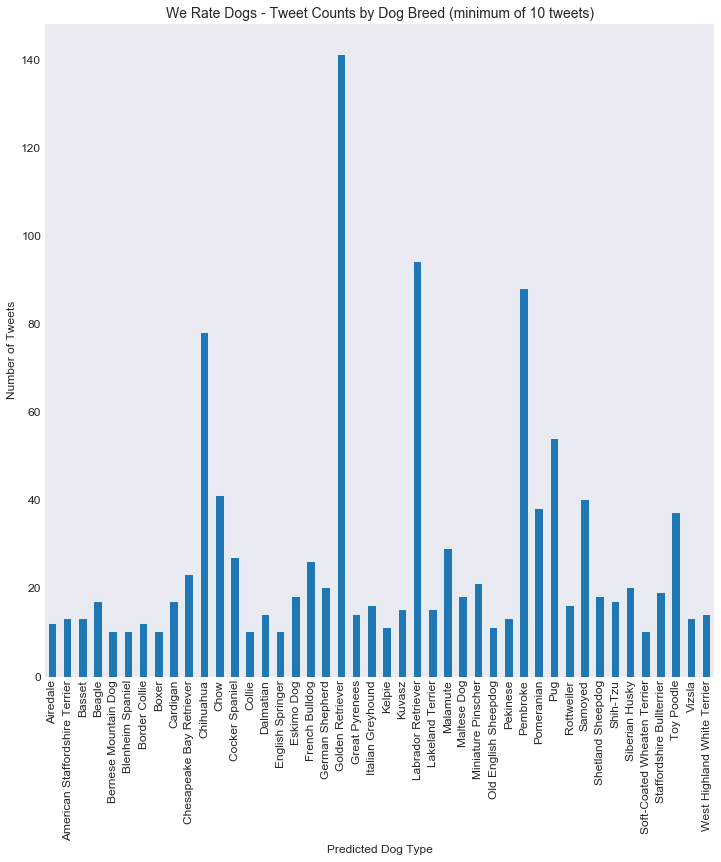

In [552]:
#filter out those tweets which are not dogs based on the predictions data
df_p3 = df_fnl.query("p1_dog")
#Create a count of ratings by predicted dog
df_p3_b = df_p3.groupby('p1')['tweet_id'].count().reset_index()
#Limit data to dog breeds tweeted more than 10 times.
df_p3_c = df_p3_b.query("tweet_id >= 10")

df_p3_c.plot.bar(y="tweet_id",x="p1",figsize=(12,12),legend = False)
plt.title("We Rate Dogs - Tweet Counts by Dog Breed (minimum of 10 tweets)", fontsize=14)
plt.xlabel("Predicted Dog Type",fontsize=12)
plt.ylabel("Number of Tweets",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('Counts_by_Dog_Breed.png')

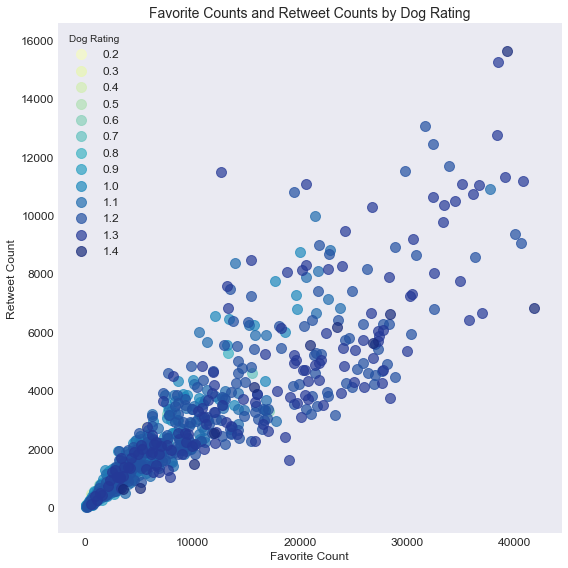

In [553]:
#subset data to include tweets predicted to be dogs with a rating less than 2 (filters out teh outlier found earlier)
#and limits x a y data to 98% quantile
df_p4 = df_fnl.query("p1_dog \
        and dog_rating < 2 \
        and retweet_count < retweet_count.quantile(.98) \
        and favorite_count < favorite_count.quantile(.98)")
[['retweet_count', 'favorite_count','dog_rating']]

sns.set_style("dark")
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x='favorite_count', y="retweet_count", data=df_p4, fit_reg=False, hue='dog_rating'
           ,size=8,aspect=1,scatter_kws={"alpha":0.7,"s":100},legend=False, palette = 'YlGnBu')
plt.title('Favorite Counts and Retweet Counts by Dog Rating',fontsize = 14)
plt.xlabel('Favorite Count',fontsize=12)
plt.ylabel('Retweet Count', fontsize=12)
plt.legend(title="Dog Rating", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Fav_and_Retw_by_Rating.png')
